In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [ ]:
# we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X, y = load_breast_cancer(return_X_y = True)

In [ ]:
print("Features {}".format(X.shape))
print("Target {}".format(y.shape))

Features (569, 30)
Target (569,)


In [ ]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#Normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Create a classifier
classifier = RandomForestClassifier(n_estimators=100, max_depth=4)
#Train the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [ ]:
classifier.score(X_train, y_train)

0.9953051643192489

In [ ]:
#Test set
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.951048951048951

In [ ]:
#Read the data
dataset = load_breast_cancer()
X, y = load_breast_cancer(return_X_y = True)
#Normalize
sc = StandardScaler()
X_normalized = sc.fit_transform(X)
#Apply PCA 
pca = PCA(n_components = 2).fit(X_normalized)
pca_X = pca.transform(X_normalized)

In [ ]:
pca_X.shape

(569, 2)

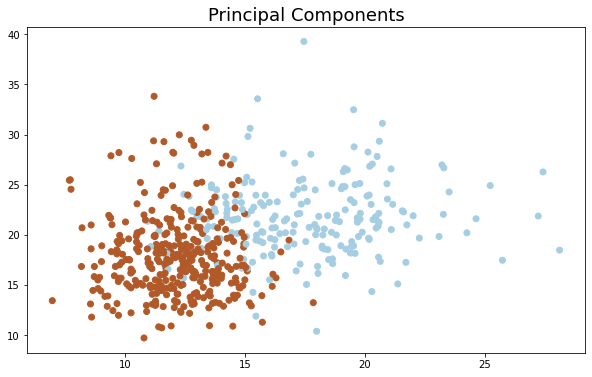

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("Principal Components", fontsize=18)
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, random_state=1)
clf = RandomForestClassifier(n_estimators=100, max_depth=4)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [ ]:
print("Accuracy on training set {}".format(clf.score(X_train, y_train)))
y_pred = clf.predict(X_test)
print("Accuracy on test set {}".format(accuracy_score(y_test, y_pred)))

Accuracy on training set 0.971830985915493
Accuracy on test set 0.9370629370629371
